# Real time Sign to Text (Eng Sign Lang.)
### Sign Language MNIST
![png](eng_sign\sign_lang_tutorial.png)  
z와 j는 유사한 수어가 존재하고 움직이는 방식으로 구분하는거 같음

### 사용 라이브러리

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image, ImageDraw
import tkinter as tk
import operator
import os
import glob

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping

### Data Load

In [10]:
train = pd.read_csv("./eng_sign/sign_mnist_train.csv")
test = pd.read_csv("./eng_sign/sign_mnist_test.csv")

train.shape, test.shape

((27455, 785), (7172, 785))

In [3]:
display(train.sample(3))
display(test.sample(3))

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
1636,14,190,191,193,194,194,196,197,198,198,...,233,232,233,235,234,233,234,233,232,232
11455,1,140,145,149,153,155,157,160,162,163,...,3,31,43,31,29,28,23,29,32,26
16941,0,46,91,88,11,14,52,54,60,66,...,93,68,114,168,161,166,169,172,174,176


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
4216,4,188,189,189,191,191,189,189,189,190,...,222,225,225,223,223,221,218,216,215,213
4172,8,180,181,183,183,185,185,186,187,186,...,80,150,221,210,211,211,209,208,206,204
890,15,86,83,81,81,83,85,85,86,89,...,119,119,118,118,117,123,196,187,165,156


### Label

In [11]:
labels = train["label"].values
unique_val = np.array(labels)

In [5]:
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

J와 Z는 해당 데이터셋에 존재하지 않음

### Data Distribution

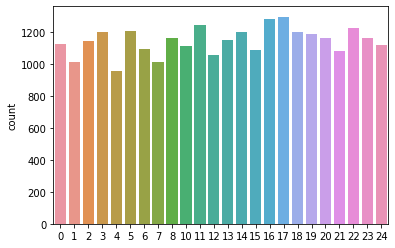

In [6]:
_ = sns.countplot(x=labels)

### Data Preprocessing

In [12]:
train.drop(columns="label", axis=1, inplace=True)

In [13]:
imgs = train.values
imgs = np.array([np.reshape(i, (28, 28)) for i in imgs]) # 28 by 28로 사이즈 변경
imgs = np.array([i.flatten() for i in imgs])

In [14]:
# 라벨 인코딩
label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)

### Display Images (Data)

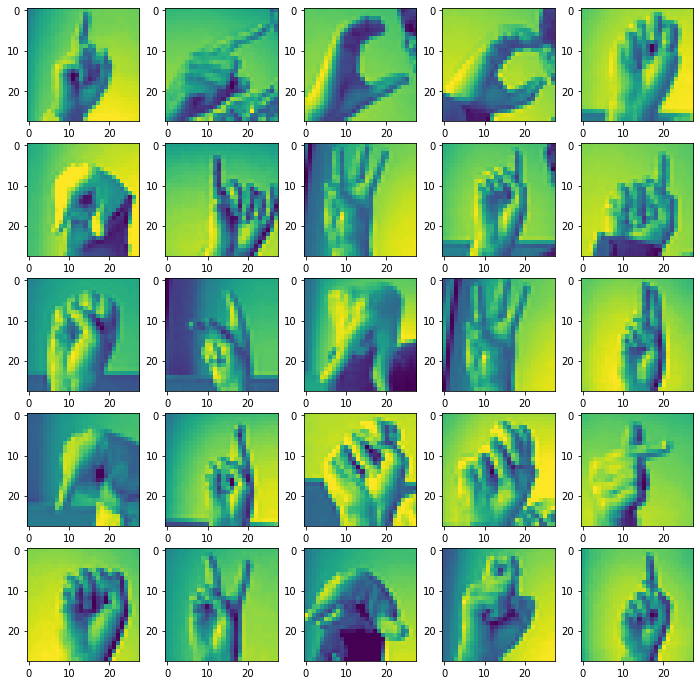

In [18]:
plt.figure(figsize=(12, 12))
for idx in range(25):
    plt.subplot(5, 5, idx+1)
    plt.imshow(imgs[idx].reshape(28, 28))

In [57]:
# openCV로 확인
for idx in range(25):
    rand = np.random.randint(0, len(imgs))
    sample_img = imgs[rand]
    sample_img = sample_img.reshape(28, 28).astype(np.uint8)
    sample_img = cv2.resize(sample_img, None, fx=10, fy=10, interpolation=cv2.INTER_CUBIC)
    cv2.imshow("Sample", sample_img)
    cv2.waitKey(0)
cv2.destroyAllWindows()

### Data Split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(imgs, labels, test_size=0.2)

print(f"x_train: {x_train.shape}\ny_train: {y_train.shape}\nx_test: {x_test.shape}\ny_test: {y_test.shape}")

x_train: (21964, 784)
y_train: (21964, 24)
x_test: (5491, 784)
y_test: (5491, 24)


In [8]:
x_train = x_train/255
x_test = x_test/255

### Modeling

In [9]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [10]:
# CNN model
model = Sequential()
# Conv layer 1
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Conv layer 2
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Conv layer 3
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Ouput layer
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(24, activation="softmax"))

In [11]:
model.compile(
    optimizer="adam",
    loss = tf.keras.losses.CategoricalCrossentropy(),
    metrics=["accuracy"]
)

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

In [12]:
early_stopping = EarlyStopping(monitor="val_accuracy", mode="max", verbose=0, patience=10)

In [13]:
with tf.device("/device:GPU:0"):
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=128, verbose=1, callbacks=[early_stopping])

Epoch 1/50
172/172 [==============================] - 29s 108ms/step - loss: 2.5225 - accuracy: 0.2308 - val_loss: 1.4543 - val_accuracy: 0.5529
Epoch 2/50
172/172 [==============================] - 8s 44ms/step - loss: 1.1235 - accuracy: 0.6200 - val_loss: 0.6265 - val_accuracy: 0.8011
Epoch 3/50
172/172 [==============================] - 5s 32ms/step - loss: 0.6152 - accuracy: 0.7904 - val_loss: 0.3410 - val_accuracy: 0.9082
Epoch 4/50
172/172 [==============================] - 7s 41ms/step - loss: 0.3651 - accuracy: 0.8814 - val_loss: 0.1954 - val_accuracy: 0.9494
Epoch 5/50
172/172 [==============================] - 16s 93ms/step - loss: 0.2374 - accuracy: 0.9231 - val_loss: 0.1058 - val_accuracy: 0.9803
Epoch 6/50
172/172 [==============================] - 10s 58ms/step - loss: 0.1513 - accuracy: 0.9536 - val_loss: 0.0602 - val_accuracy: 0.9911
Epoch 7/50
172/172 [==============================] - 5s 31ms/step - loss: 0.1027 - accuracy: 0.9707 - val_loss: 0.0409 - val_accuracy: 0.

In [14]:
model.save("eng_sign_lang_cnn_epochs50_27.h5")

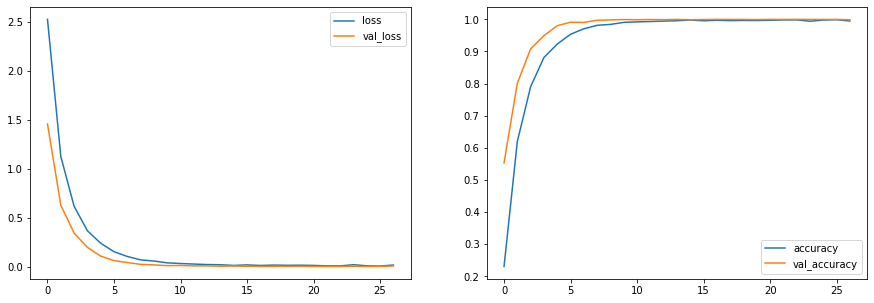

In [20]:
df_hist = pd.DataFrame(history.history)
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
_ = df_hist[["loss", "val_loss"]].plot(ax=ax[0])
_ = df_hist[["accuracy", "val_accuracy"]].plot(ax=ax[1])

### Evaluation

In [15]:
test_labels = test["label"]
test.drop(columns="label", axis=1, inplace=True)

test_img = test.values
test_img = np.array([np.reshape(i, (28, 28)) for i in test_img])
test_img = np.array([i.flatten() for i in test_img])

test_labels = label_binrizer.transform(test_labels)

test_img = test_img.reshape(test_img.shape[0], 28, 28, 1)

y_pred = model.predict(test_img)

In [16]:
accuracy_score(test_labels, y_pred.round())

0.7968488566648075

층을 깊게 안쌓아서 그런지 성능이 그렇게 좋지는 못함

### Matching func.

In [2]:
alpha = [chr(x).upper() for x in range(97, 123)]
alpha.remove("J")
alpha.remove("Z")
idx = [x for x in range(0, 24)]

In [3]:
def convert_letter(result):
    classLabels = {idx:c for idx, c in zip(idx, alpha)}
    try:
        res = int(result)
        return classLabels[res]
    except:
        return "err"

In [31]:
convert_letter(np.argmax(model.predict(test_img[4].reshape(1, 28, 28, 1))))

'D'

### Test on Real Time

In [4]:
model = tf.keras.models.load_model("./eng_sign_lang_cnn_epochs50_27.h5")

In [7]:
cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

while True:
    ret, frame = cap.read()
    # frame = cv2.flip(frame, 1)
    
    roi = frame[100:400, 300:600]
    # cv2.imshow("roi", roi)
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    roi = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)
    roi = roi.reshape(1, 28, 28, 1)
    
    result = convert_letter(np.argmax(model.predict(roi)))
    
    cv2.putText(frame, result, (300, 100), cv2.FONT_HERSHEY_DUPLEX, 2, (255, 0, 0), 2)
    cv2.rectangle(frame, pt1=(320, 100), pt2=(620, 400), color=(255, 0, 0), thickness=3)
    cv2.imshow("Sign Translator", frame)
    
    if cv2.waitKey(1)==ord("q"): break
    
cap.release()
cv2.destroyAllWindows()